In [1]:
%%capture
%pip install kmodes

In [2]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 516.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data wraling

import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import  KElbowVisualizer,SilhouetteVisualizer, InterclusterDistance,  kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
#Classes
from sklearn.cluster import KMeans, DBSCAN, MeanShift
#Functions
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
#Dimensionality reduction 
from sklearn.decomposition import PCA
#data Normalization
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [3]:
sns.set_theme(
    context= 'talk',
    style = 'ticks',
    font_scale =.8,
    palette = 'tab10',
    rc = {
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [4]:
df =  pd.read_csv('processedRFMdataset')

In [11]:
df

,CustomerID,preco_total,R,F,MT
0,12347,4310.00,366 days 21:53:00,182,2.644011
1,12348,1797.24,316 days 22:20:00,31,5.764839
2,12349,1757.55,246 days 02:07:00,73,8.289041
3,12350,334.40,182 days 23:49:00,17,3.841176
4,12352,2506.04,129 days 04:02:00,85,15.930706
...,...,...,...,...,...
4332,18280,180.60,308 days 03:51:00,10,4.765000
4333,18281,80.82,289 days 23:59:00,7,5.622857
4334,18282,178.05,289 days 23:57:00,12,5.199167
4335,18283,2045.53,289 days 00:09:00,721,1.628752


In [10]:
df = df.drop('Unnamed: 0',axis=1)

In [326]:
df1 = df

In [327]:
df1['R'] = pd.to_timedelta(df1['R'])

In [328]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   CustomerID   4337 non-null   int64          
 1   preco_total  4337 non-null   float64        
 2   R            4337 non-null   timedelta64[ns]
 3   F            4337 non-null   int64          
 4   MT           4337 non-null   float64        
dtypes: float64(2), int64(2), timedelta64[ns](1)
memory usage: 169.5 KB


In [329]:
df1 = df.assign(R_days= lambda x: x['R'].dt.days)

In [330]:
df1

,CustomerID,preco_total,R,F,MT,R_days
0,12347,4310.00,366 days 21:53:00,182,2.644011,366
1,12348,1797.24,316 days 22:20:00,31,5.764839,316
2,12349,1757.55,246 days 02:07:00,73,8.289041,246
3,12350,334.40,182 days 23:49:00,17,3.841176,182
4,12352,2506.04,129 days 04:02:00,85,15.930706,129
...,...,...,...,...,...,...
4332,18280,180.60,308 days 03:51:00,10,4.765000,308
4333,18281,80.82,289 days 23:59:00,7,5.622857,289
4334,18282,178.05,289 days 23:57:00,12,5.199167,289
4335,18283,2045.53,289 days 00:09:00,721,1.628752,289


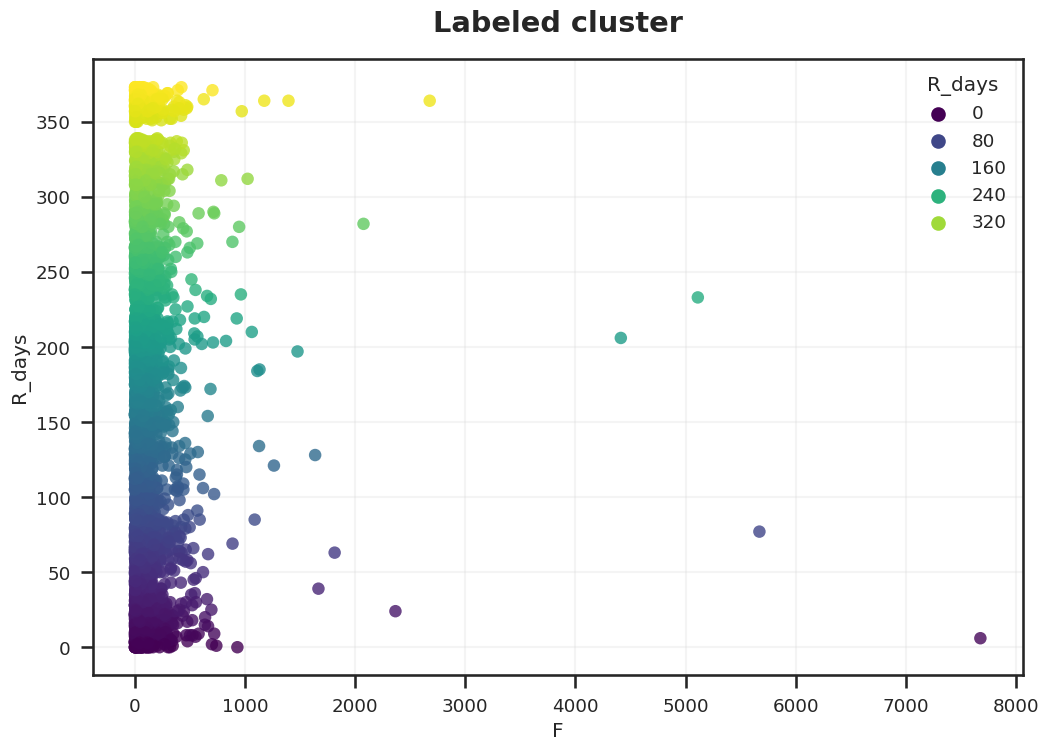

In [331]:
sns.scatterplot(data=df1, x='F', y='R_days',hue=df1['R_days'], **scatter_kwargs)
plt.title('Labeled cluster')
plt.show()

In [332]:
df1['MT'].max()

2033.1

In [333]:
df1['MT'].describe()

count    4337.000000
mean        4.463805
std        34.215558
min         0.122500
25%         2.206479
50%         2.917778
75%         3.830163
max      2033.100000
Name: MT, dtype: float64

In [334]:
df1 = df1.drop('R',axis = 1)

In [335]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4337 non-null   int64  
 1   preco_total  4337 non-null   float64
 2   F            4337 non-null   int64  
 3   MT           4337 non-null   float64
 4   R_days       4337 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 169.5 KB


/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will chang

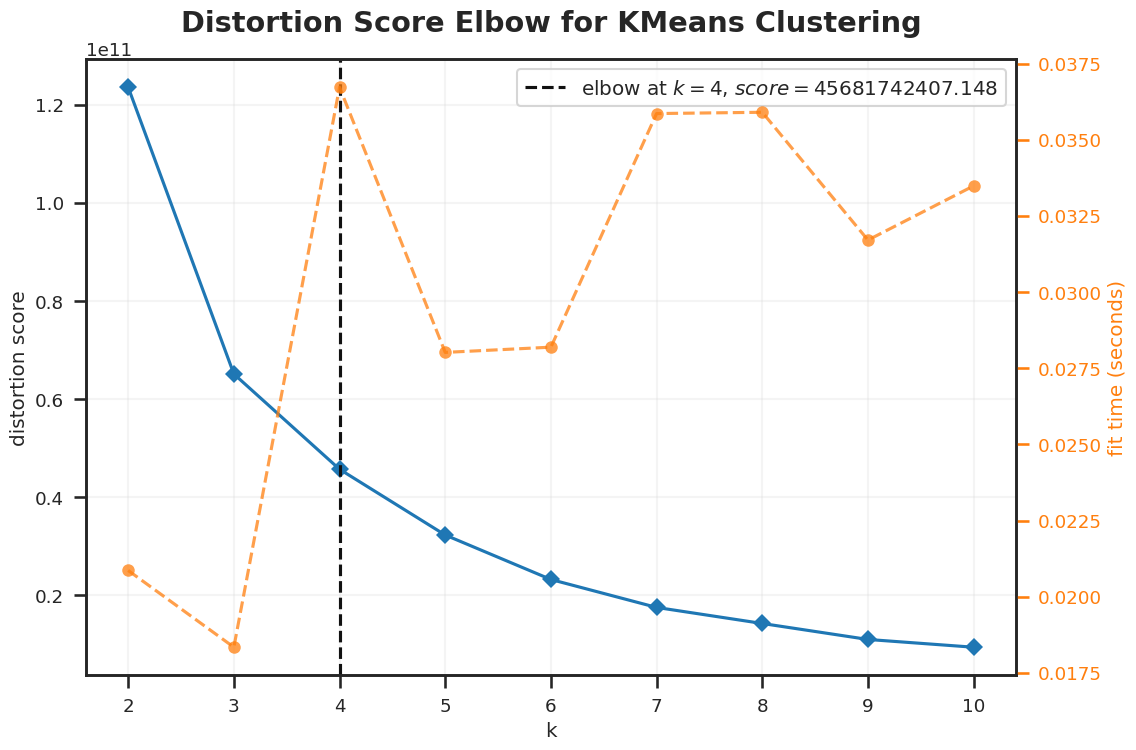

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10))

In [336]:
kelbow_visualizer(KMeans(), df1, k=10, timings=True)

In [337]:
centroids, labels, inertia = k_means(df1, n_clusters=4)

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



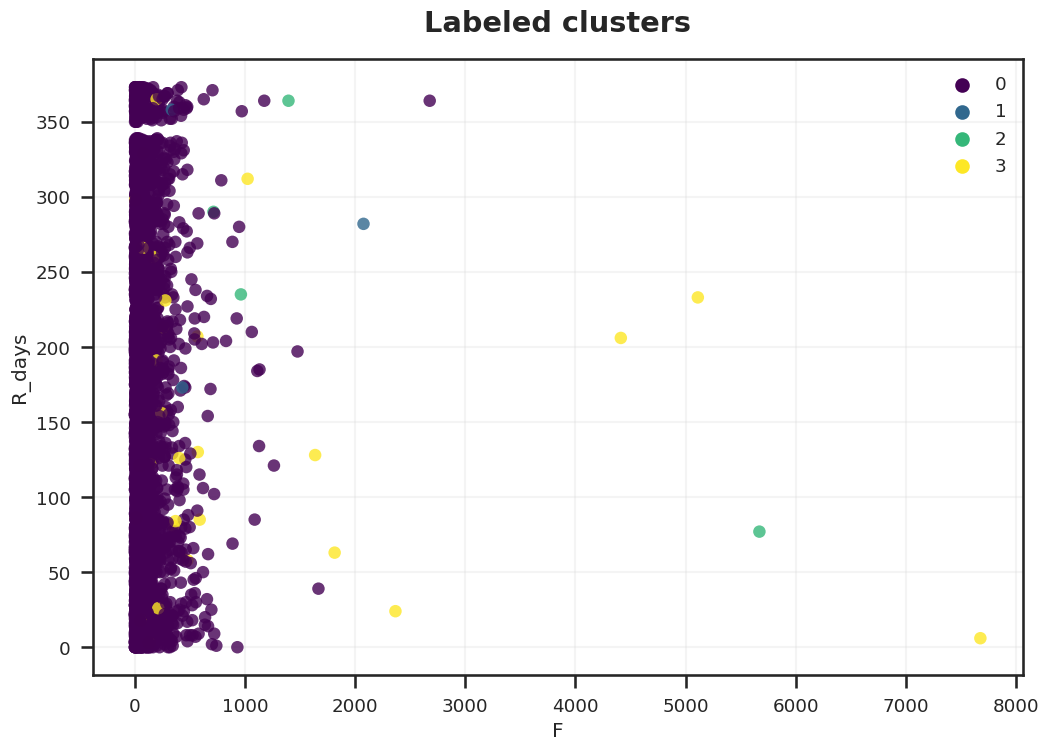

In [338]:
sns.scatterplot(data=df1, x='F', y='R_days', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [339]:
df1.columns

Index(['CustomerID', 'preco_total', 'F', 'MT', 'R_days'], dtype='object')

In [340]:
df2 = df1[['F', 'MT', 'R_days']]

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



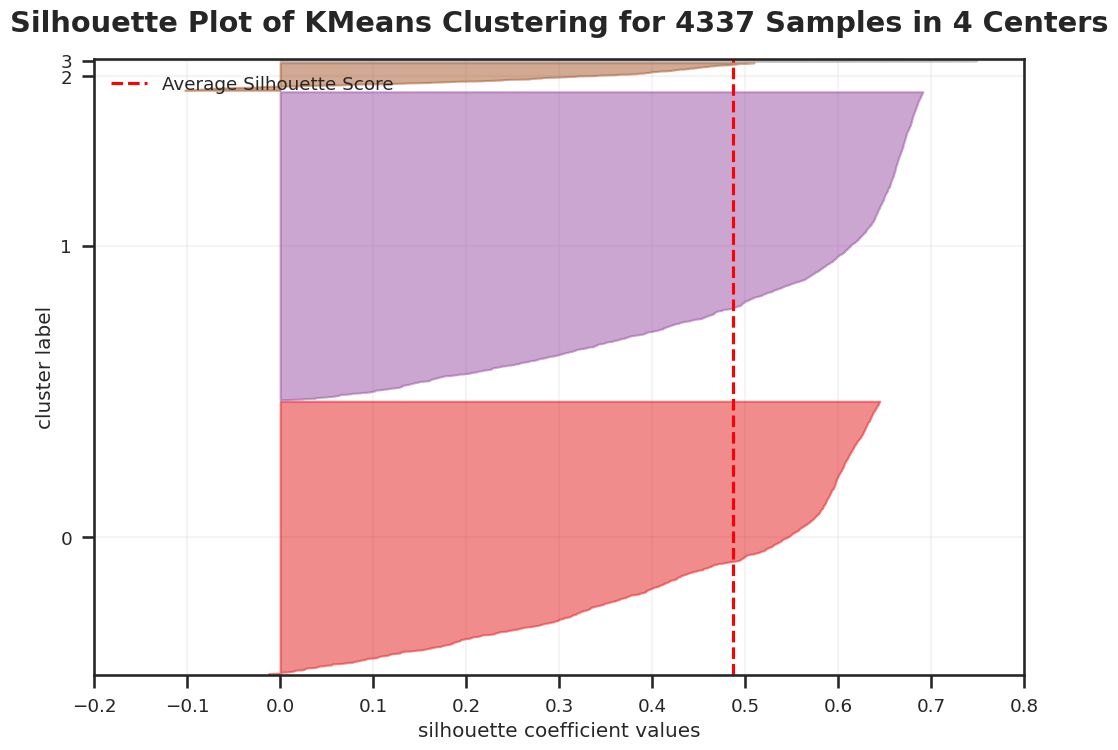

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4337 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [341]:
silhouette_visualizer(KMeans(n_clusters=4), df2)

In [342]:
df2 = df2.apply(scale)

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



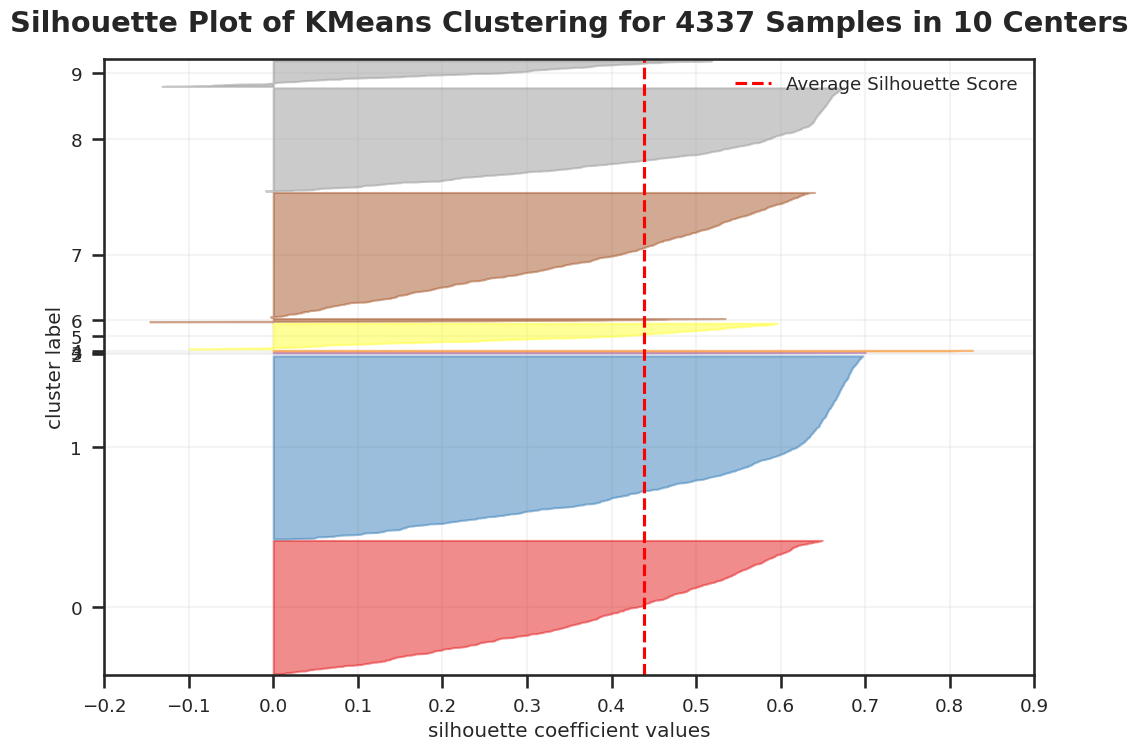

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4337 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=10))

In [343]:
silhouette_visualizer(KMeans(n_clusters=10), df2)

In [344]:
df2.describe()

,F,MT,R_days
count,4.337000e+03,4.337000e+03,4.337000e+03
mean,2.047910e-17,4.095819e-18,1.089488e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-3.970856e-01,-1.268957e-01,-1.426657e+00
25%,-3.261331e-01,-6.598130e-02,-9.114812e-01
50%,-2.197042e-01,-4.519014e-02,-9.430599e-02
75%,3.306423e-02,-1.852128e-02,8.383396e-01
max,3.363797e+01,5.929671e+01,1.886456e+00


In [345]:
df2 = df2.drop(df2[df2['MT'] > 8.383396e-01].index)


In [346]:
centroids, labels, inertia = k_means(df2, n_clusters=10)

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



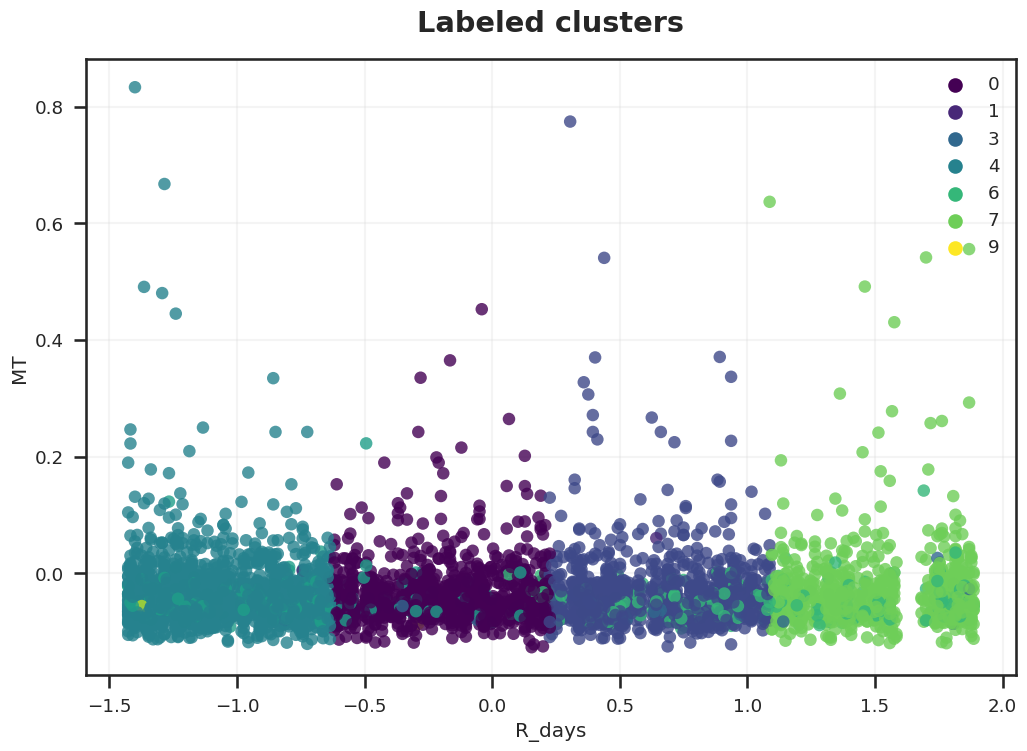

In [347]:
sns.scatterplot(data=df2, x='R_days', y='MT', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [348]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(df2)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(df2, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will chang

[{'k': 2,
  'inertia': 5371.555234028095,
  'silhouette_score': 0.5286149900088493,
  'davies_bouldin_score': 0.7256306762252892,
  'calinski_harabasz_score': 2649.3825122401204},
 {'k': 3,
  'inertia': 2881.120521336661,
  'silhouette_score': 0.5357089195157048,
  'davies_bouldin_score': 0.5313276893596829,
  'calinski_harabasz_score': 4334.119943680282},
 {'k': 4,
  'inertia': 2082.695979191887,
  'silhouette_score': 0.5562332433757664,
  'davies_bouldin_score': 0.6132638139157738,
  'calinski_harabasz_score': 4547.4469848573635},
 {'k': 5,
  'inertia': 1516.3223001946096,
  'silhouette_score': 0.47780102304188116,
  'davies_bouldin_score': 0.635022586064682,
  'calinski_harabasz_score': 5086.160134064951},
 {'k': 6,
  'inertia': 1214.4587211650155,
  'silhouette_score': 0.4878822904470805,
  'davies_bouldin_score': 0.6504776148126877,
  'calinski_harabasz_score': 5293.499120178326},
 {'k': 7,
  'inertia': 1035.7389428606825,
  'silhouette_score': 0.42200517150193473,
  'davies_bould

In [349]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,5371.555234,0.528615,0.725631,2649.382512
3,2881.120521,0.535709,0.531328,4334.119944
4,2082.695979,0.556233,0.613264,4547.446985
5,1516.322300,0.477801,0.635023,5086.160134
6,1214.458721,0.487882,0.650478,5293.499120
7,1035.738943,0.422005,0.701642,5295.261822
8,884.215695,0.441730,0.672726,5420.986883
9,791.185052,0.444920,0.704248,5363.083602
10,687.274132,0.439408,0.626206,5558.990369


In [350]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,5371.555234,0.528615,0.725631,2649.382512
3,2881.120521,0.535709,0.531328,4334.119944
4,2082.695979,0.556233,0.613264,4547.446985
5,1516.322300,0.477801,0.635023,5086.160134
6,1214.458721,0.487882,0.650478,5293.499120
7,1035.738943,0.422005,0.701642,5295.261822
8,884.215695,0.441730,0.672726,5420.986883
9,791.185052,0.444920,0.704248,5363.083602
10,687.274132,0.439408,0.626206,5558.990369


In [351]:
@interact(k=(2,11), data=['df2','df1'])
def plot_kmeans(k, data):
    df_selected = globals()[data]  # Obter o DataFrame usando o nome da variável
    
    # Criar modelo KMeans
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_selected)
    
    # Plotar o scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_selected['MT'], y=df_selected['R_days'], hue=labels, palette='Set2', legend='full')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('MT')
    plt.ylabel('R_days')
    plt.show()
    #data = globals()[df2]
    #data = df2 if data == 'df2' else df1
    #model = KMeans(n_clusters=k, random_state=42)
    #labels = model.fit_predict(data)
    #sns.scatterplot( x=data[:,1], y=data[:,2], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

In [352]:
df2.head()

,F,MT,R_days
0,0.405565,-0.053192,1.824279
1,-0.264050,0.038029,1.380162
2,-0.077799,0.111811,0.758399
3,-0.326133,-0.018199,0.189929
4,-0.024585,0.335176,-0.280835


In [353]:
df3_F = df2.drop('F', axis=1)

In [354]:
df3_F.describe()

,MT,R_days
count,4318.000000,4318.000000
mean,-0.033942,-0.000716
std,0.060671,1.000284
min,-0.126896,-1.426657
25%,-0.066030,-0.911481
50%,-0.045303,-0.094306
75%,-0.019124,0.838340
max,0.833273,1.886456


In [355]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(df3_F)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(df3_F, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will chang

[{'k': 2,
  'inertia': 1038.008466028334,
  'silhouette_score': 0.6401919989181761,
  'davies_bouldin_score': 0.48465091258778403,
  'calinski_harabasz_score': 13710.190368691074},
 {'k': 3,
  'inertia': 459.16535948090336,
  'silhouette_score': 0.6020829651715079,
  'davies_bouldin_score': 0.5118506709008229,
  'calinski_harabasz_score': 18214.441308891484},
 {'k': 4,
  'inertia': 271.10951579169136,
  'silhouette_score': 0.5662522179322751,
  'davies_bouldin_score': 0.5237989094007728,
  'calinski_harabasz_score': 21557.218338650957},
 {'k': 5,
  'inertia': 174.58191728181257,
  'silhouette_score': 0.5549650344255482,
  'davies_bouldin_score': 0.5254803625005167,
  'calinski_harabasz_score': 25697.62186087046},
 {'k': 6,
  'inertia': 120.2396840012177,
  'silhouette_score': 0.5588986114886161,
  'davies_bouldin_score': 0.5164354527648363,
  'calinski_harabasz_score': 30233.707441036946},
 {'k': 7,
  'inertia': 92.11033352700633,
  'silhouette_score': 0.5488239459863288,
  'davies_bou

In [356]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,1038.008466,0.640192,0.484651,13710.190369
3,459.165359,0.602083,0.511851,18214.441309
4,271.109516,0.566252,0.523799,21557.218339
5,174.581917,0.554965,0.525480,25697.621861
6,120.239684,0.558899,0.516435,30233.707441
7,92.110334,0.548824,0.528393,33099.128709
8,74.752248,0.526177,0.551028,35094.154681
9,63.153082,0.516974,0.571838,36444.035909
10,52.710474,0.524300,0.568573,38890.812841


/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will chang

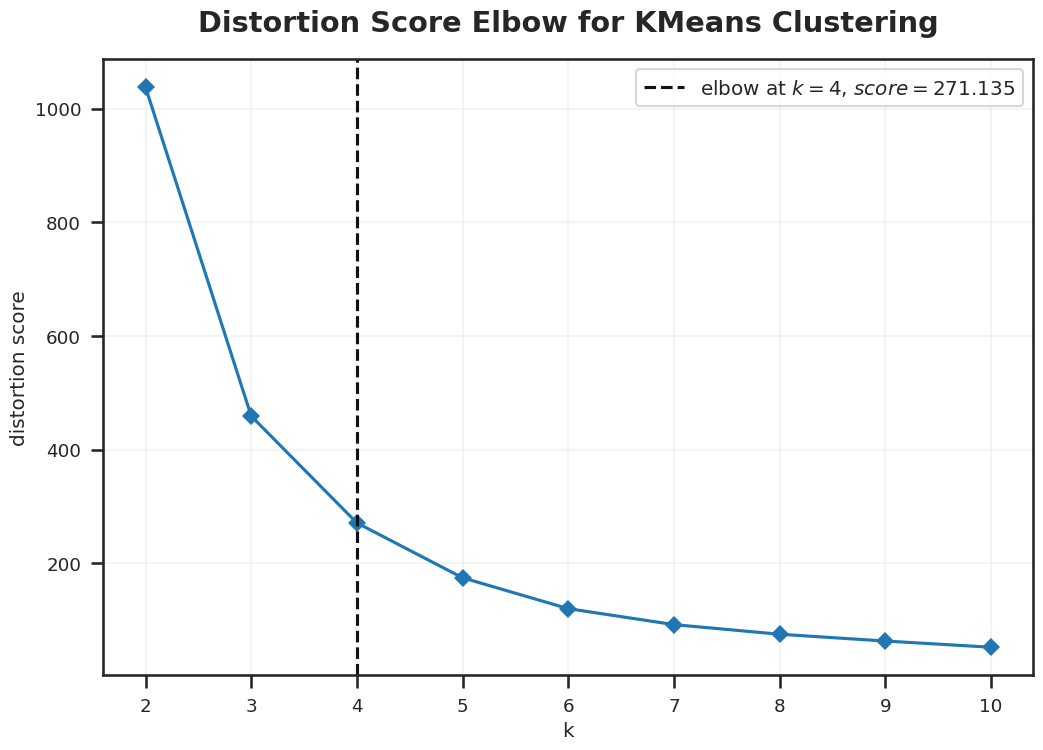

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [357]:
kelbow_visualizer(KMeans(), df3_F, k=10, timings=False)

In [358]:
@interact(k=(2,11), data=['df3_F','df2','df1'])
def plot_kmeans(k, data):
    df_selected = globals()[data]  # Obter o DataFrame usando o nome da variável    
    # Criar modelo KMeans
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_selected)
    
    # Plotar o scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_selected['R_days'], y=df_selected['MT'], hue=labels, palette='Set2', legend='full')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('MT')
    plt.ylabel('R_days')
    plt.show()
    #data = globals()[df2]
    #data = df2 if data == 'df2' else df1
    #model = KMeans(n_clusters=k, random_state=42)
    #labels = model.fit_predict(data)
    #sns.scatterplot( x=data[:,1], y=data[:,2], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

In [359]:
df1 = df1.drop(df1[df1['MT'] > 200].index)
df1 = df1.drop(df1[df1['preco_total'] > 1658].index)

In [360]:
df1[['preco_total','F','MT','R_days']] =  df1[['preco_total','F','MT','R_days']].apply(scale)

In [361]:
pca = PCA()
pca_components = pca.fit_transform(df1[['preco_total','F','MT','R_days']])

df_pca = pd.DataFrame(pca_components,columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-0.791408,0.085151,-0.165737,0.019716
1,-1.443627,-0.684158,0.924483,0.264975
2,1.082541,-0.752439,1.238736,-0.647534
3,-0.691611,1.361664,-1.076515,-0.207557
4,0.504379,0.254044,1.421684,-1.275536


In [362]:
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.395445,0.395445
PC2,0.255651,0.651096
PC3,0.242132,0.893228
PC4,0.106772,1.000000


/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



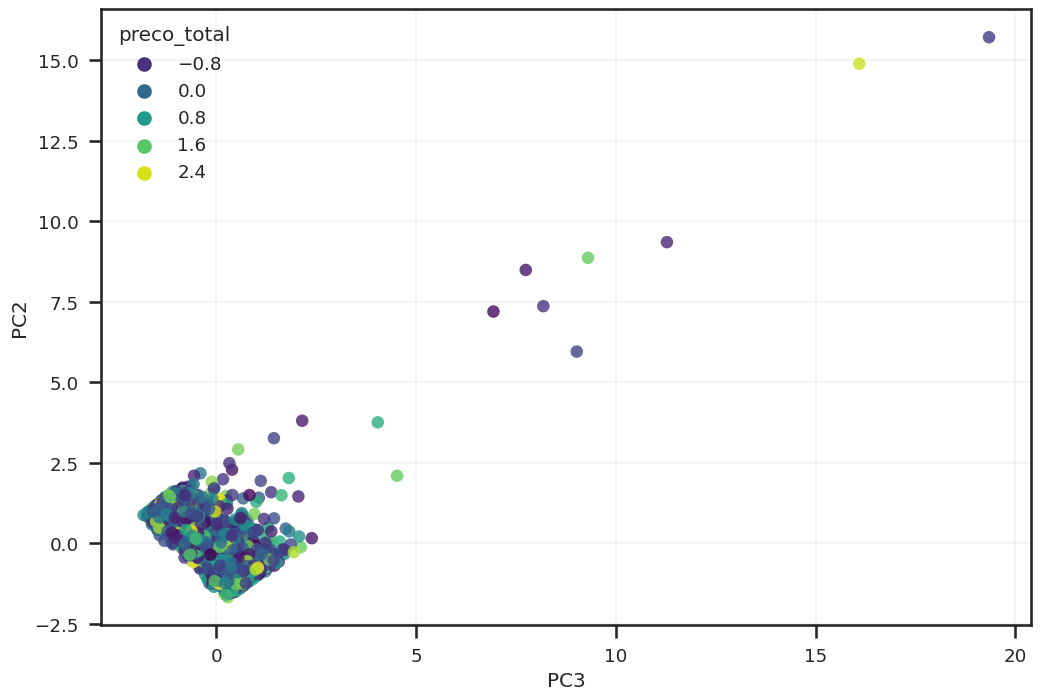

In [363]:
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC3', y='PC2', hue=df4_post_pca['preco_total'], **scatter_kwargs);

In [364]:
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

In [365]:
df4_post_pca = df1[['preco_total','F']]

In [366]:
df4_post_pca = df4_post_pca.apply(scale)

In [367]:
df4_post_pca.describe()

,preco_total,F
count,3.250000e+03,3.250000e+03
mean,2.186285e-17,-1.311771e-17
std,1.000154e+00,1.000154e+00
min,-1.374333e+00,-8.827635e-01
25%,-8.135823e-01,-6.298765e-01
50%,-3.014967e-01,-3.137678e-01
75%,6.013166e-01,2.552278e-01
max,2.648145e+00,1.058144e+01


In [368]:
@interact(k=(2,11), data=['df4_post_pca','df3_F','df2','df1'])
def plot_kmeans(k, data):
    df_selected = globals()[data]  # Obter o DataFrame usando o nome da variável    
    # Criar modelo KMeans
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_selected)
    
    # Plotar o scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_selected['F'], y=df_selected['preco_total'], hue=labels, palette='Set2', legend='full')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('TOTAL_PRICE')
    plt.ylabel('F')
    plt.show()

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

<Axes: xlabel='preco_total', ylabel='F'>

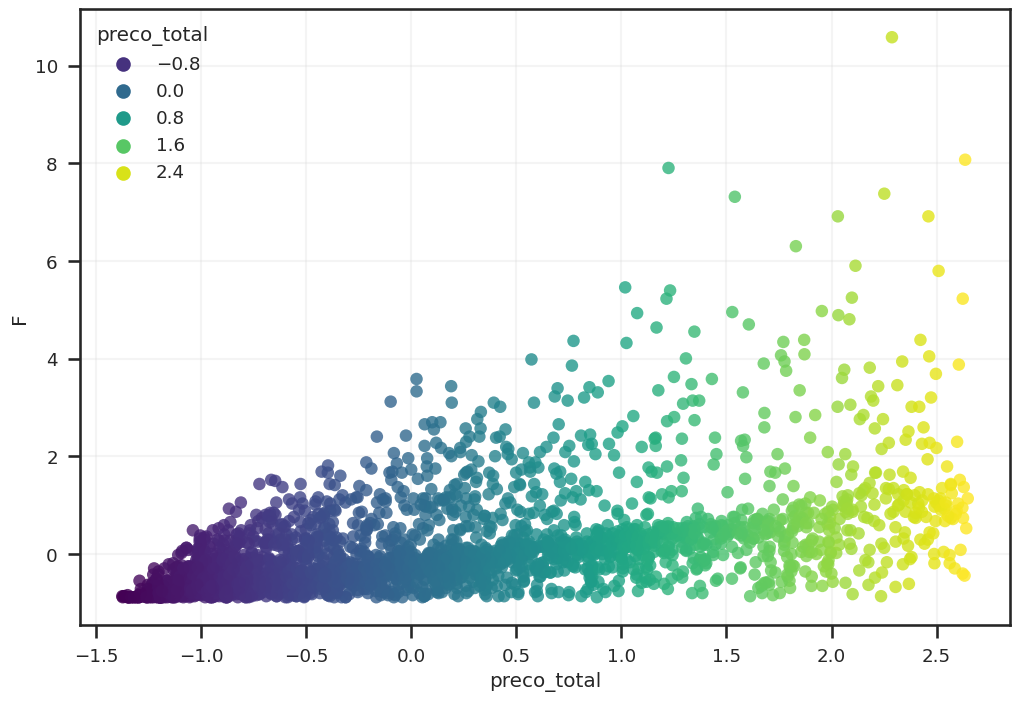

In [369]:
sns.scatterplot(data = df1 , x= 'preco_total', y='F', hue='preco_total', **scatter_kwargs)

In [370]:
df1.nlargest(10,'MT')

,CustomerID,preco_total,F,MT,R_days
2320,15510,-0.773531,-0.882763,25.627448,-0.341040
2332,15524,-0.311563,-0.882763,22.462488,0.440459
4300,18233,-0.311563,-0.882763,22.462488,1.097629
2146,15269,-0.387423,-0.861690,15.072308,-0.056858
1809,14816,-0.720405,-0.819542,13.278831,0.848970
1352,14185,-0.900815,-0.840616,11.856357,1.568305
3181,16692,1.721097,-0.840616,10.924452,0.333891
3759,17500,1.385562,-0.798468,10.709938,-1.273510
605,13145,0.122493,-0.777394,10.163455,1.062107
418,12881,-0.656823,-0.756320,6.209667,-1.397840


In [371]:
df1['preco_total'].describe()

count    3.250000e+03
mean     3.498057e-17
std      1.000154e+00
min     -1.374333e+00
25%     -8.135823e-01
50%     -3.014967e-01
75%      6.013166e-01
max      2.648145e+00
Name: preco_total, dtype: float64

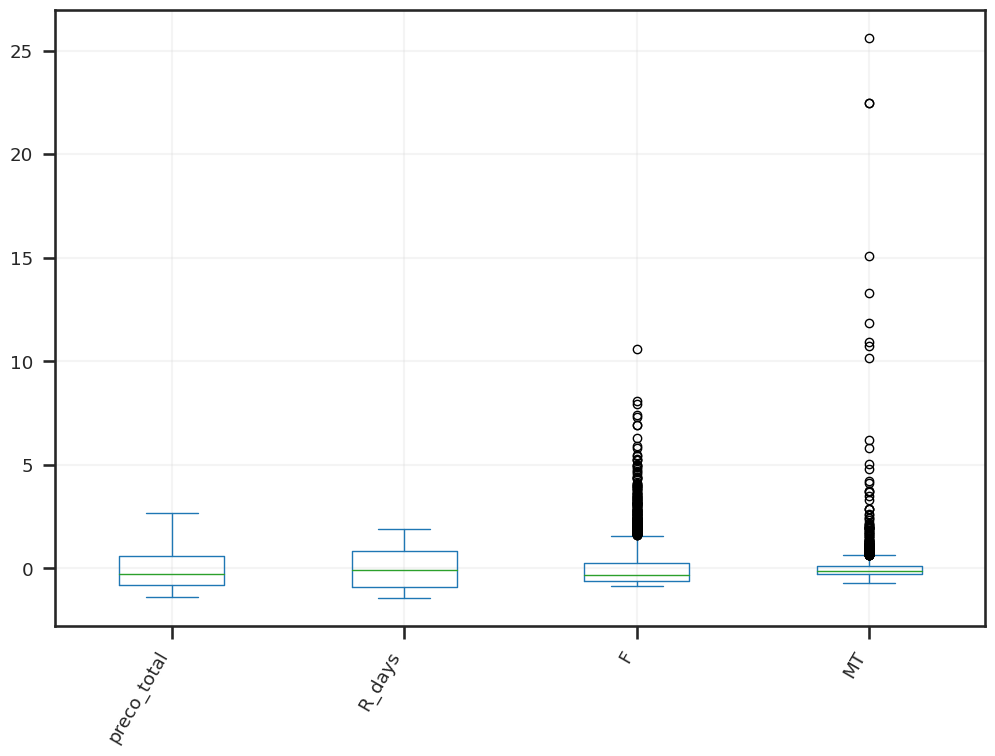

In [372]:
df1[['preco_total','R_days','F','MT']].plot.box()
plt.xticks(rotation=60, ha='right');

In [373]:
outlier_rows = df1.abs().gt(3).any(axis=1)
outlier_rows.sum()

3250

In [375]:
df1 = df1.drop(df1[outlier_rows].index)

In [376]:
df1

,CustomerID,preco_total,F,MT,R_days


In [323]:
df1 = df1[~outlier_rows]

In [324]:
df1.head()

,CustomerID,preco_total,F,MT,R_days


In [316]:
outlier_rows

3       True
5       True
6       True
7       True
10      True
        ... 
4330    True
4331    True
4332    True
4333    True
4334    True
Length: 3250, dtype: bool